
First of all we need to define some basic functions for creating adjacency matrix form edges list , extend the graph to k-hop graph, create edges list from adjacency matrix , and finally a function to check if two graphs are k-hop similar



In [ ]:
import numpy as np
from re import A
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations





In [ ]:

def create_adjacency_matrix(edges, num_vertices):
    adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

    for edge in edges:
        u, v = edge
        adj_matrix[u][v] = 1
        adj_matrix[v][u] = 1

    return adj_matrix

In [ ]:
def extend_graph_k_hop(adj_matrix, k):

    # Convert the adjacency matrix to a numpy array

    graph1 = np.array(adj_matrix)
    sum_g1 = graph1


    # Compute the k-hop adjacency matrix
    for i in range(2,k+1):
      sum_g1 = sum_g1+np.linalg.matrix_power(graph1, i)



    sum_g1 = np.where(sum_g1>=1,1,0)

    return sum_g1

In [ ]:
def adjacency_matrix_to_edges(adj_matrix):

    edges = []
    num_vertices = len(adj_matrix)

    for i in range(num_vertices):
        for j in range(i+1, num_vertices):
            if adj_matrix[i][j] != 0:
                edges.append((i, j))

    return edges


In [ ]:

#this function gets 2 graphs(in adjacency form) and an integer k and then checks if both graphs are k-hop similar
def are_k_hop_similar(graph1, graph2, k):
    # Check if the graphs have the same number of vertices
    if len(graph1) != len(graph2):
        return False

    # Convert the adjacency matrices to numpy arrays
    graph1 = np.array(graph1)
    graph2 = np.array(graph2)
    sum_g1 = graph1
    sum_g2 = graph2

    # Check if the adjacency matrices are equal
    if np.array_equal(graph2, graph1):

        return False

    # Compute the k-hop + adding 1-k hop graphs of each graph adjacency matrices

    for i in range(2,k+1):
      sum_g1 = sum_g1+np.linalg.matrix_power(graph1, i)
      sum_g2 = sum_g2+np.linalg.matrix_power(graph2, i)





    sum_g1 = np.where( sum_g1>= 1, 1, 0)
    sum_g2 = np.where( sum_g2>= 1, 1, 0)

    # Check if the k-hop adjacency matrices are equal
    if np.array_equal(sum_g2, sum_g1):

        return True

    return False




 Here we import the Karate Club graph using NetworkX and then create an adjacency matrix of the Karate Club graph.
 After that, we use the extend_graph_k_hop function to extend our graph to a k-hop graph .Also we make another graph which is called G' which equals to  
        (K-hop_G - G = G')
 Finally, we create the adjacency matrix of our extended graph and G'.

In [ ]:


G = nx.karate_club_graph()
edges = list(G.edges())

adj_matrix_karate_club = create_adjacency_matrix(edges,34)
adj_matrix_karate_club

# choose an arbitary k
k = 2

AdjacencyG_K_hop = extend_graph_k_hop(adj_matrix_karate_club,k)
list_of_edges_G = adjacency_matrix_to_edges(adj_matrix_karate_club)
list_of_edges_G_K_hop = adjacency_matrix_to_edges(AdjacencyG_K_hop)
def subtract_lists(list1, list2):
    result = [x for x in list1 if x not in list2]
    return result
list_of_edges_Gprime = subtract_lists(list_of_edges_G_K_hop,list_of_edges_G)
print("how many edges dose Gprime have? ",len(list_of_edges_Gprime ))
print(list_of_edges_Gprime)
print("how many edges does G have? ",len(list_of_edges_G))
print(list_of_edges_G)
print("how many edges does G_k_hop have? ",len(list_of_edges_G_K_hop))
print(list_of_edges_G_K_hop)



how many edges dose Gprime have?  265
[(0, 9), (0, 16), (0, 24), (0, 25), (0, 27), (0, 28), (0, 30), (0, 32), (0, 33), (1, 4), (1, 5), (1, 6), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 27), (1, 28), (1, 31), (1, 32), (1, 33), (2, 4), (2, 5), (2, 6), (2, 10), (2, 11), (2, 12), (2, 14), (2, 15), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 29), (2, 30), (2, 31), (2, 33), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (3, 10), (3, 11), (3, 17), (3, 19), (3, 21), (3, 27), (3, 28), (3, 30), (3, 31), (3, 32), (3, 33), (4, 5), (4, 7), (4, 8), (4, 11), (4, 12), (4, 13), (4, 16), (4, 17), (4, 19), (4, 21), (4, 31), (5, 7), (5, 8), (5, 11), (5, 12), (5, 13), (5, 17), (5, 19), (5, 21), (5, 31), (6, 7), (6, 8), (6, 10), (6, 11), (6, 12), (6, 13), (6, 17), (6, 19), (6, 21), (6, 31), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 17), (7, 19), (7, 21), (7, 27), (7, 28), (7, 30), (7, 31), (7, 32), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 

Now we try to find a k-hop simillar graph with karate club graph just by adding or removing some edges to karate club.

In [ ]:

#satisfying subsets list is set of subsets of edges which are k-hop similaer to karate club graph
def find_satisfying_subsets(lst1,lst2):
    satisfying_subsets = []
    flag = False

    for r in range(1):

        if(flag):
          break

        for subset1 in combinations(lst1, r):

          if(flag):
            break
          for x in range(6,8,1):

              if(flag):
                break
              for subset2 in combinations(lst2,78-x):

                if(flag):
                  break;
                subset = subset1 + subset2


                #we make adj_matirx of the selected subset

                adj_matrix = create_adjacency_matrix(subset,34)

                #we check if selected subset and karate graph are k_hop similar

                if are_k_hop_similar(adj_matrix, adj_matrix_karate_club,k):

                    flag = True
                    satisfying_subsets.append(subset)



    return satisfying_subsets



satisfying_subsets = find_satisfying_subsets(list_of_edges_Gprime,list_of_edges_G)
print(satisfying_subsets[0])



((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 33), (24, 27), (24, 31), (25, 31), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 33), (31, 32), (31, 33), (32, 33))


In [ ]:



# Get the Karate Club graph
karate_graph = nx.karate_club_graph()

# Sort the nodes of your graph based on the node order of the Karate Club graph
sorted_nodes = sorted(G.nodes(), key=lambda x: list(karate_graph.nodes()).index(x))
labels = {node: karate_graph.nodes[node]['club'] for node in sorted_nodes}

# Create a new graph with sorted nodes
G_sim = nx.Graph()
G_sim.add_nodes_from(sorted_nodes)
G_sim.add_edges_from(satisfying_subsets[0])
nx.set_node_attributes(G_sim, labels, 'club')
# Print the sorted nodes and edges of G_sorted
print("Sorted nodes of G:", sorted_nodes)
print("Edges of G_sorted:", G_sim.edges())

for node in G_sim.nodes():
    label = labels[node]
    print("Node:", node, "Label:", label)
for node in karate_graph.nodes():
    label = labels[node]
    print("Node:", node, "Label:", label)


Sorted nodes of G: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges of G_sorted: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 33), (24, 27), (24, 31), (25, 31), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 33), (31, 32), (31, 33), (32, 33)]
Node: 0 Label: Mr. Hi
Node: 1 Label: Mr. Hi
Node: 2 Label: Mr. Hi
Node: 3 Label: Mr. Hi
Node: 4 Label: Mr. Hi
Node: 5 Label: Mr. Hi
Node: 6 Label: Mr. Hi
Node: 7 Label: Mr. Hi

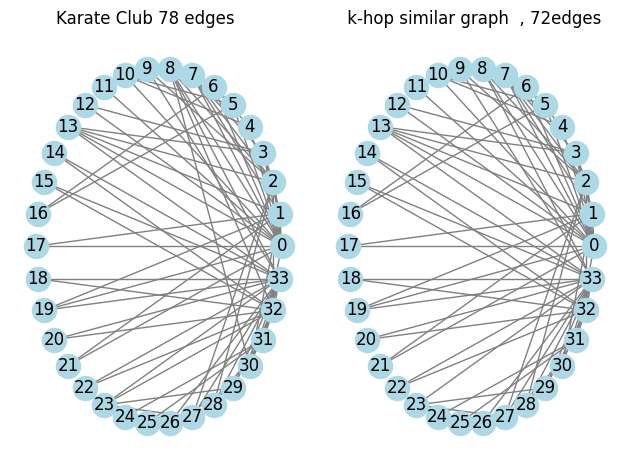

In [ ]:


#
# Iterate over each set of edges
for i, edges in enumerate(satisfying_subsets):
    # Create a new figure for each pair of graphs
    plt.figure(i+1)



    # Create the second graph
    graph2 = nx.Graph()
    graph2.add_edges_from(edges)

    # Plot the first graph
    plt.subplot(121)
    nx.draw_circular(G, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title('Karate Club 78 edges     ')

    # Plot the second graph
    plt.subplot(122)
    nx.draw_circular(G_sim, with_labels=True, node_color='lightblue', edge_color='gray')
    show =' k-hop similar graph  , '+str(len(satisfying_subsets[i]))+"edges"
    plt.title(show)

# Display all the plots
plt.tight_layout()
plt.show()


In [ ]:
import networkx as nx

def check_shortest_paths(graph1, graph2, k):
    for node1 in graph1.nodes():
        for node2 in graph1.nodes():
            shortest_path_graph1 = nx.shortest_path(graph1, node1, node2)
            shortest_path_graph2 = nx.shortest_path(graph2, node1, node2)

            if len(shortest_path_graph1)-1 <= k and len(shortest_path_graph2)-1 > k:

                return False
            if len(shortest_path_graph1)-1 > k and len(shortest_path_graph2)-1 <= k:

                return False

    return True



# Check if both shortest paths are either greater than k or smaller than k
result = check_shortest_paths(G, G_sim, k)

print(result)


True


In [ ]:
accuracy_list = []

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
!pip install torch_geometric
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import networkx as nx

# Create two NetworkX Karate Club graphs
karate_graph1 = nx.karate_club_graph()
graph2 = G_sim

# Convert NetworkX graphs to PyTorch Geometric graphs
edge_index1 = torch.tensor(list(karate_graph1.edges)).t().contiguous()
x1 = torch.eye(karate_graph1.number_of_nodes())  # One-hot encoding of node features
y1 = torch.tensor([karate_graph1.nodes[node]['club'] == 'Mr. Hi' for node in karate_graph1.nodes], dtype=torch.long)

data1 = Data(x=x1, edge_index=edge_index1, y=y1)

edge_index2 = torch.tensor(list(graph2.edges)).t().contiguous()
x2 = torch.eye(graph2.number_of_nodes())  # One-hot encoding of node features
y2 = torch.tensor([graph2.nodes[node]['club'] == 'Mr. Hi' for node in graph2.nodes], dtype=torch.long)
data2 = Data(x=x2, edge_index=edge_index2, y=y2)

# Split the dataset into train and test sets
train_mask = torch.zeros(data1.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data1.num_nodes, dtype=torch.bool)

train_mask[:25] = True  # Set the first 25 nodes as the training set
test_mask[25:] = True  # Set the remaining nodes as the test set

data1.train_mask = train_mask
data1.test_mask = test_mask

data2.train_mask = train_mask
data2.test_mask = test_mask

class GNN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create two identical GCN models
num_features = data1.num_features
num_classes = int(data1.y.max()) + 1


model1 = GNN(num_features, num_classes)
model2 = GNN(num_features, num_classes)

optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = F.nll_loss(output[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

def test(model, data):
    model.eval()
    output = model(data.x, data.edge_index)
    pred = output.argmax(dim=1)
    acc = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    return acc

# Training loop
for epoch in range(200):
    train(model1, optimizer1, data1)
    train(model2, optimizer2, data2)
    if epoch % 10 == 0:
        acc1 = test(model1, data1)
        acc2 = test(model2, data2)
        print(f"Epoch: {epoch}, Model 1 Test Accuracy: {acc1}, Model 2 Test Accuracy: {acc2}")

# Calculate the percentage of similarity in node classification
output1 = model1(data1.x, data1.edge_index)
output2 = model2(data2.x, data2.edge_index)
pred1 = output1.argmax(dim=1)
pred2 = output2.argmax(dim=1)

print(pred1)
print(pred2)
print(y2)
percentage_similar = (pred1 == pred2).sum().item() / len(pred1) * 100
accuracy_list.append(percentage_similar)
print(f"Percentage of similarity in node classification: {percentage_similar}%")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 13.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=411bbc09b0c3c95766305ff762a8a525c42c971ca4e0779fc51dfd78e1d51422
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric
Epoch: 0, Model 1 Test Accuracy: 0.2222222222222222, Model 2 Test Accuracy: 0.1111111111111111
Epoch: 10, Model 1 Test Accuracy: 0.1111111111111111, Model 2 Test Accuracy: 0.1111111111111111
Epoch: 20, Model 1 Test Accuracy: 0.1111111111111111, Model 2 Test Accuracy: 0.4444444444444444
Epoch: 30, Model 1 Test Accuracy: 0.5555555555555556, Model 2 Test Accuracy: 0.6666666666666666
Epoch: 40, Model 1 Test Accuracy: 0.5555555555555556, Model 2 Test Accuracy: 0.77777777777

In [ ]:

# Create two NetworkX Karate Club graphs
karate_graph1 = nx.karate_club_graph()
graph2 = G_sim

# Convert NetworkX graphs to PyTorch Geometric graphs
edge_index1 = torch.tensor(list(karate_graph1.edges)).t().contiguous()
x1 = torch.eye(karate_graph1.number_of_nodes())  # One-hot encoding of node features
y1 = torch.tensor([karate_graph1.nodes[node]['club'] == 'Mr. Hi' for node in karate_graph1.nodes], dtype=torch.long)

data1 = Data(x=x1, edge_index=edge_index1, y=y1)

edge_index2 = torch.tensor(list(graph2.edges)).t().contiguous()
x2 = torch.eye(graph2.number_of_nodes())  # One-hot encoding of node features
y2 = torch.tensor([graph2.nodes[node]['club'] == 'Mr. Hi' for node in graph2.nodes], dtype=torch.long)
data2 = Data(x=x2, edge_index=edge_index2, y=y2)

# Split the dataset into train and test sets
train_mask = torch.zeros(data1.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data1.num_nodes, dtype=torch.bool)

train_mask[:25] = True  # Set the first 25 nodes as the training set
test_mask[25:] = True  # Set the remaining nodes as the test set

data1.train_mask = train_mask
data1.test_mask = test_mask

data2.train_mask = train_mask
data2.test_mask = test_mask

class GNN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, 25)
        self.conv2 = GCNConv(25, 16)
        self.conv3 = GCNConv(16, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)


# Create two identical GCN models
num_features = data1.num_features
num_classes = int(data1.y.max()) + 1



model1 = GNN(num_features, num_classes)
model2 = GNN(num_features, num_classes)

optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = F.nll_loss(output[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

def test(model, data):
    model.eval()
    output = model(data.x, data.edge_index)
    pred = output.argmax(dim=1)
    acc = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    return acc

# Training loop
for epoch in range(200):
    train(model1, optimizer1, data1)
    train(model2, optimizer2, data2)
    if epoch % 10 == 0:
        acc1 = test(model1, data1)
        acc2 = test(model2, data2)
        print(f"Epoch: {epoch}, Model 1 Test Accuracy: {acc1}, Model 2 Test Accuracy: {acc2}")

# Calculate the percentage of similarity in node classification
output1 = model1(data1.x, data1.edge_index)
output2 = model2(data2.x, data2.edge_index)
pred1 = output1.argmax(dim=1)
pred2 = output2.argmax(dim=1)

print(pred1)
print(pred2)
print(y2)
percentage_similar = (pred1 == pred2).sum().item() / len(pred1) * 100
accuracy_list.append(percentage_similar)
print(f"Percentage of similarity in node classification: {percentage_similar}%")


Epoch: 0, Model 1 Test Accuracy: 0.4444444444444444, Model 2 Test Accuracy: 0.0
Epoch: 10, Model 1 Test Accuracy: 0.3333333333333333, Model 2 Test Accuracy: 0.0
Epoch: 20, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.4444444444444444
Epoch: 30, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 40, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 50, Model 1 Test Accuracy: 0.8888888888888888, Model 2 Test Accuracy: 0.8888888888888888
Epoch: 60, Model 1 Test Accuracy: 0.8888888888888888, Model 2 Test Accuracy: 0.8888888888888888
Epoch: 70, Model 1 Test Accuracy: 0.8888888888888888, Model 2 Test Accuracy: 0.8888888888888888
Epoch: 80, Model 1 Test Accuracy: 0.8888888888888888, Model 2 Test Accuracy: 0.8888888888888888
Epoch: 90, Model 1 Test Accuracy: 0.8888888888888888, Model 2 Test Accuracy: 0.8888888888888888
Epoch: 100, Model 1 Test Accuracy: 0.8888888888888888, Model 2 Test Acc

In [ ]:
karate_graph1 = nx.karate_club_graph()
graph2 = G_sim

# Convert NetworkX graphs to PyTorch Geometric graphs
edge_index1 = torch.tensor(list(karate_graph1.edges)).t().contiguous()
x1 = torch.eye(karate_graph1.number_of_nodes())  # One-hot encoding of node features
y1 = torch.tensor([karate_graph1.nodes[node]['club'] == 'Mr. Hi' for node in karate_graph1.nodes], dtype=torch.long)

data1 = Data(x=x1, edge_index=edge_index1, y=y1)

edge_index2 = torch.tensor(list(graph2.edges)).t().contiguous()
x2 = torch.eye(graph2.number_of_nodes())  # One-hot encoding of node features
y2 = torch.tensor([graph2.nodes[node]['club'] == 'Mr. Hi' for node in graph2.nodes], dtype=torch.long)
data2 = Data(x=x2, edge_index=edge_index2, y=y2)

# Split the dataset into train and test sets
train_mask = torch.zeros(data1.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data1.num_nodes, dtype=torch.bool)

train_mask[:25] = True  # Set the first 25 nodes as the training set
test_mask[25:] = True  # Set the remaining nodes as the test set

data1.train_mask = train_mask
data1.test_mask = test_mask

data2.train_mask = train_mask
data2.test_mask = test_mask

class GNN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, 25)
        self.conv2 = GCNConv(25, 20)
        self.conv3 = GCNConv(20, 8)
        self.conv4 = GCNConv(8, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv4(x, edge_index)
        return F.log_softmax(x, dim=1)



# Create two identical GCN models
num_features = data1.num_features
num_classes = int(data1.y.max()) + 1



model1 = GNN(num_features, num_classes)
model2 = GNN(num_features, num_classes)

optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = F.nll_loss(output[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

def test(model, data):
    model.eval()
    output = model(data.x, data.edge_index)
    pred = output.argmax(dim=1)
    acc = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    return acc

# Training loop
for epoch in range(200):
    train(model1, optimizer1, data1)
    train(model2, optimizer2, data2)
    if epoch % 10 == 0:
        acc1 = test(model1, data1)
        acc2 = test(model2, data2)
        print(f"Epoch: {epoch}, Model 1 Test Accuracy: {acc1}, Model 2 Test Accuracy: {acc2}")

# Calculate the percentage of similarity in node classification
output1 = model1(data1.x, data1.edge_index)
output2 = model2(data2.x, data2.edge_index)
pred1 = output1.argmax(dim=1)
pred2 = output2.argmax(dim=1)

print(pred1)
print(pred2)
print(y2)
percentage_similar = (pred1 == pred2).sum().item() / len(pred1) * 100
accuracy_list.append(percentage_similar)
print(f"Percentage of similarity in node classification: {percentage_similar}%")


Epoch: 0, Model 1 Test Accuracy: 0.0, Model 2 Test Accuracy: 0.0
Epoch: 10, Model 1 Test Accuracy: 0.0, Model 2 Test Accuracy: 0.0
Epoch: 20, Model 1 Test Accuracy: 0.0, Model 2 Test Accuracy: 0.0
Epoch: 30, Model 1 Test Accuracy: 0.4444444444444444, Model 2 Test Accuracy: 0.2222222222222222
Epoch: 40, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.3333333333333333
Epoch: 50, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.3333333333333333
Epoch: 60, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.6666666666666666
Epoch: 70, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 80, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 90, Model 1 Test Accuracy: 0.8888888888888888, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 100, Model 1 Test Accuracy: 0.8888888888888888, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 110, Model 1 Test Accuracy:

In [ ]:
karate_graph1 = nx.karate_club_graph()
graph2 = G_sim

# Convert NetworkX graphs to PyTorch Geometric graphs
edge_index1 = torch.tensor(list(karate_graph1.edges)).t().contiguous()
x1 = torch.eye(karate_graph1.number_of_nodes())  # One-hot encoding of node features
y1 = torch.tensor([karate_graph1.nodes[node]['club'] == 'Mr. Hi' for node in karate_graph1.nodes], dtype=torch.long)

data1 = Data(x=x1, edge_index=edge_index1, y=y1)

edge_index2 = torch.tensor(list(graph2.edges)).t().contiguous()
x2 = torch.eye(graph2.number_of_nodes())  # One-hot encoding of node features
y2 = torch.tensor([graph2.nodes[node]['club'] == 'Mr. Hi' for node in graph2.nodes], dtype=torch.long)
data2 = Data(x=x2, edge_index=edge_index2, y=y2)

# Split the dataset into train and test sets
train_mask = torch.zeros(data1.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data1.num_nodes, dtype=torch.bool)

train_mask[:25] = True  # Set the first 25 nodes as the training set
test_mask[25:] = True  # Set the remaining nodes as the test set

data1.train_mask = train_mask
data1.test_mask = test_mask

data2.train_mask = train_mask
data2.test_mask = test_mask

class GNN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, 24)
        self.conv2 = GCNConv(24, 16)
        self.conv3 = GCNConv(16, 12)
        self.conv4 = GCNConv(12, 8)
        self.conv5 = GCNConv(8, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv4(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv5(x, edge_index)
        return F.log_softmax(x, dim=1)





# Create two identical GCN models
num_features = data1.num_features
num_classes = int(data1.y.max()) + 1



model1 = GNN(num_features, num_classes)
model2 = GNN(num_features, num_classes)

optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = F.nll_loss(output[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

def test(model, data):
    model.eval()
    output = model(data.x, data.edge_index)
    pred = output.argmax(dim=1)
    acc = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    return acc

# Training loop
for epoch in range(200):
    train(model1, optimizer1, data1)
    train(model2, optimizer2, data2)
    if epoch % 10 == 0:
        acc1 = test(model1, data1)
        acc2 = test(model2, data2)
        print(f"Epoch: {epoch}, Model 1 Test Accuracy: {acc1}, Model 2 Test Accuracy: {acc2}")

# Calculate the percentage of similarity in node classification
output1 = model1(data1.x, data1.edge_index)
output2 = model2(data2.x, data2.edge_index)
pred1 = output1.argmax(dim=1)
pred2 = output2.argmax(dim=1)

print(pred1)
print(pred2)
print(y2)
percentage_similar = (pred1 == pred2).sum().item() / len(pred1) * 100
accuracy_list.append(percentage_similar)
print(f"Percentage of similarity in node classification: {percentage_similar}%")

Epoch: 0, Model 1 Test Accuracy: 1.0, Model 2 Test Accuracy: 0.2222222222222222
Epoch: 10, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.2222222222222222
Epoch: 20, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.2222222222222222
Epoch: 30, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.6666666666666666
Epoch: 40, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 50, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 60, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 70, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 80, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 90, Model 1 Test Accuracy: 0.7777777777777778, Model 2 Test Accuracy: 0.7777777777777778
Epoch: 100, Model 1 Test Accuracy: 0.8888888888888888, M

In [ ]:
print(accuracy_list)

[100.0, 100.0, 97.05882352941177, 94.11764705882352]


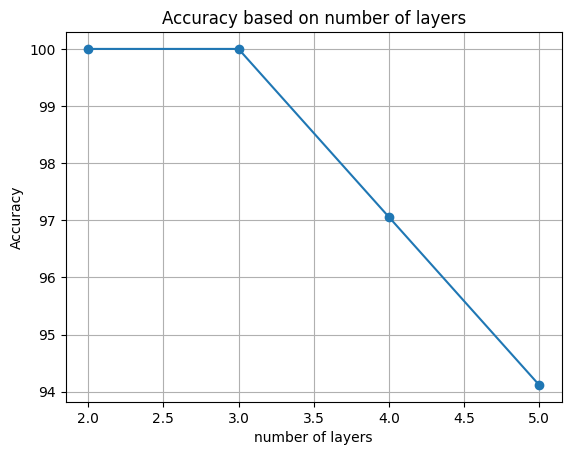

In [ ]:
L_values = [2, 3, 4, 5]

# Plotting the accuracy based on k
plt.plot(L_values, accuracy_list, marker='o')
plt.xlabel('number of layers')
plt.ylabel('Accuracy')
plt.title('Accuracy based on number of layers')
plt.grid(True)
plt.show()